### Sentiment Analysis

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from utils import set_seed, train_val_test_split, get_device, create_rnn_dataloaders, SparseDataset
from data_processing import load_and_preprocess_data, build_vocabulary, vectorize_data, process_in_chunks
from training import train_rnn, train_mnb, train_sgd
from visualize import plot_wordcloud
from config import config


### Preparing dataset

In [7]:

set_seed()
device = get_device()
config.DEVICE = device

print("Loading and preprocessing data...")
texts, labels = load_and_preprocess_data()

print("Splitting data...")
train_texts, val_texts, test_texts, train_labels, val_labels, test_labels = train_val_test_split(texts, labels)

print("Building vocabulary...")
vocab, vectorizer = build_vocabulary(train_texts)

print("Vectorizing data...")
X_train = vectorize_data(train_texts, vectorizer)
X_val = vectorize_data(val_texts, vectorizer)
X_test = vectorize_data(test_texts, vectorizer)

Using device: mps
Loading and preprocessing data...


/Users/koyiljonvaliev/Desktop/notebooks_for_utube/sentiment_analysis/data_processing.py:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


Splitting data...
Building vocabulary...
Vectorizing data...


Choose the one algorithm from the below options and train the model

In [8]:
# Set the model name here: 'rnn', 'mnb', or 'sgd'
model_name = "sgd"

Training and evaluating SGD Classifier...
SGD Classifier Accuracy: 0.8670
Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      2500
    Positive       0.86      0.88      0.87      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000

Confusion Matrix:
[[2143  357]
 [ 308 2192]]


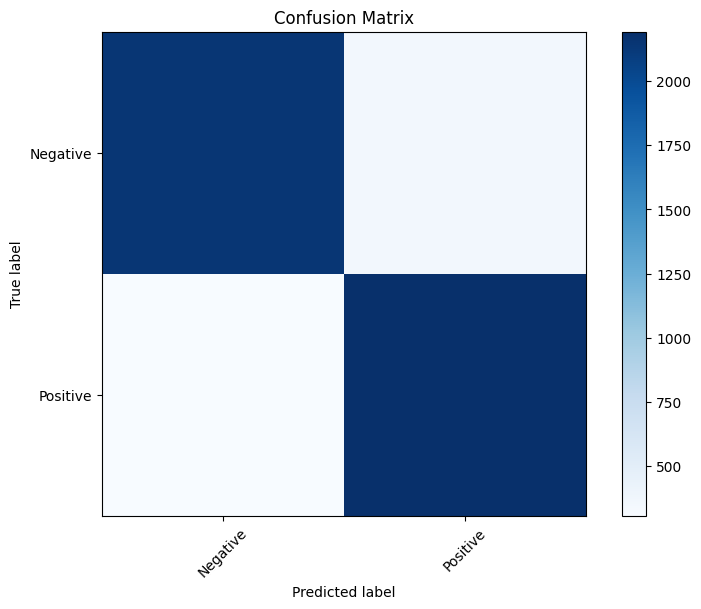

In [9]:
if model_name == 'rnn':
    print("Preparing data for RNN...")
    # Use CountVectorizer instead of TfidfVectorizer to save memory
    count_vectorizer = CountVectorizer(max_features=config.MAX_VOCAB_SIZE)
    X_train_count = count_vectorizer.fit_transform(train_texts)
    X_val_count = count_vectorizer.transform(val_texts)
    X_test_count = count_vectorizer.transform(test_texts)

    vocab = count_vectorizer.get_feature_names_out()
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}

    print("Creating DataLoaders for RNN...")
    train_loader = create_rnn_dataloaders(X_train_count, train_labels, config.BATCH_SIZE, shuffle=True)
    val_loader = create_rnn_dataloaders(X_val_count, val_labels, config.BATCH_SIZE)
    test_loader = create_rnn_dataloaders(X_test_count, test_labels, config.BATCH_SIZE)

    train_rnn(train_loader, val_loader, test_loader, len(vocab))

elif model_name == 'mnb':
    train_mnb(X_train, train_labels, X_test, test_labels)
elif model_name == 'sgd':
    train_sgd(X_train, train_labels, X_test, test_labels)
else:
    print(f"Unknown model: {model_name}")

### Generating World Clouds

Generating word clouds...


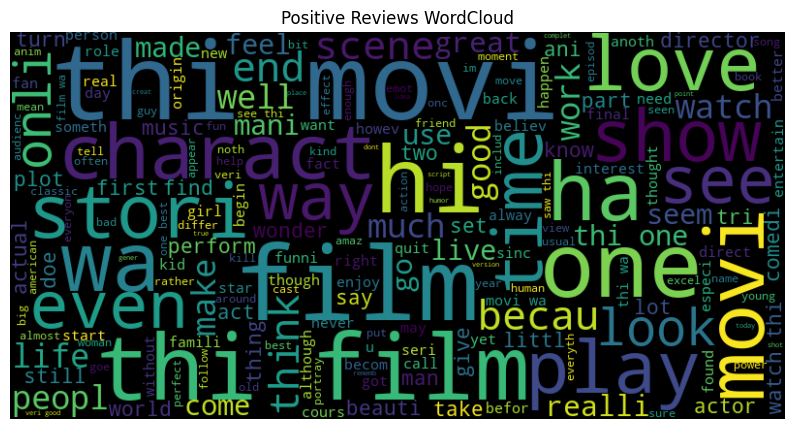

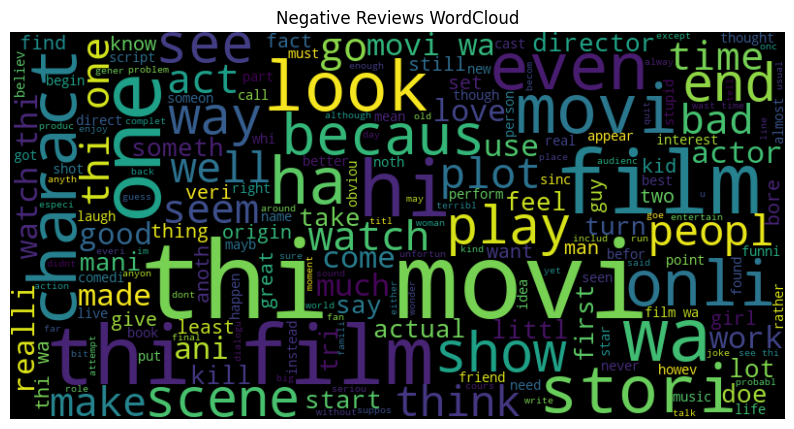

In [10]:

print("Generating word clouds...")
positive_text = ' '.join(train_texts[train_labels == 1])
negative_text = ' '.join(train_texts[train_labels == 0])
plot_wordcloud(positive_text, "Positive Reviews WordCloud")
plot_wordcloud(negative_text, "Negative Reviews WordCloud")